# Cleaning Singlehousehold Data
[Data Source](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

In [155]:
import pandas as pd
import numpy as np

In [156]:
# Change the path to the correct location of your source data
house = pd.read_csv('../data/raw/household_power_consumption/household_power_consumption.txt', sep=';');
initial_rows = len(house);
initial_columns = len(house.columns);

/tmp/ipykernel_16377/1586527565.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  house = pd.read_csv('../data/raw/household_power_consumption/household_power_consumption.txt', sep=';');


In [157]:
print(initial_rows)
print(initial_columns)
house.head(10)
# Global active power (Kw) includes all the electrical energy consumption (not all of the energy consumption was captured by the submeters!!!)
# Submeters gives the energy consumption of different places from the house:
# Submeter1 : kitchen (W-h)
# Submeter2 : laundry room (W-h)
# Submeter3 : electric-water heater and airconditioning (W-h)


2075259
9


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## Some rows have empty string and a questionmark:

In [158]:
# single row where missing data has been observed
print(house.loc[[190499]])
house["Sub_metering_3"].mean()

             Date      Time Global_active_power Global_reactive_power Voltage  \
190499  28/4/2007  00:23:00                   ?                     ?       ?   

       Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
190499                ?              ?              ?             NaN  


6.45844735712055

### Detection of columns with missing values

In [159]:
# detection of columns with missing values
house_missval_by_col = (house.isnull().sum())
house.replace('?', house["Sub_metering_3"].mean(), inplace=True)
print('--------------- all columns with missing values ---------------')
print(house_missval_by_col)
print('--------------- only columns with missing values ---------------')
print(house_missval_by_col[house_missval_by_col > 0])
print('--------------- percentage of missing values ---------------')
print(house_missval_by_col[house_missval_by_col > 0]/initial_rows * 100)

--------------- all columns with missing values ---------------
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64
--------------- only columns with missing values ---------------
Sub_metering_3    25979
dtype: int64
--------------- percentage of missing values ---------------
Sub_metering_3    1.251844
dtype: float64


### Given that the last element is NaN, we will drop those rows using *dropna*

In [160]:
house.replace(np.NaN, house["Sub_metering_3"].mean(), inplace=True)
house.dropna(subset=['Sub_metering_3'], inplace=True)
effective_rows = len(house);
effective_columns = len(house.columns);
# The measurements are one minute apart and it is averaged. To convert the power consumption to energy consumption we multiply it by the factor 1/60 (to be done only when needed). The kW(Kilo Watts) units are appropiate to work with because avoids the use of decimal zeros and avoids rounding zeros. We also drop the colmuns that we are not interested in and insert new columns to be filled with synthetic data (data enrichment).
house_filtered = house.drop(columns=['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
# The columns below need to be filled up with synthetic data

# Geolocation of Sceaus city - France
house_filtered.insert(2,'Latitude', '48.783333')
house_filtered.insert(3,'Longitude', '2.283333')

house_filtered.insert(4,'House_or_apartment', 0) # 0 house, 1 apartment
house_filtered.insert(5,'Area_of_residence', 0) # to be inserted in meters squared
house_filtered.insert(6,'House_roof_isolated', 0) # 0 no, 1 yes
house_filtered.insert(7,'House_wall_isolated', 0) # 0 no, 1 yes
house_filtered.insert(8,'House_floor_isolated', 0) # 0 no, 1 yes
house_filtered.insert(9,'Number_of_residents', 0) # to be an unsigned number
house_filtered.insert(10,'Heating_type', 0) # 0 electrical, 1 gas
house_filtered.insert(11,'Solar_panels', 0) # 0 don't use, 1 use
house_filtered.head(10)

,Date,Time,Latitude,Longitude,House_or_apartment,Area_of_residence,House_roof_isolated,House_wall_isolated,House_floor_isolated,Number_of_residents,Heating_type,Solar_panels,Global_active_power
0,16/12/2006,17:24:00,48.783333,2.283333,0,0,0,0,0,0,0,0,4.216
1,16/12/2006,17:25:00,48.783333,2.283333,0,0,0,0,0,0,0,0,5.360
2,16/12/2006,17:26:00,48.783333,2.283333,0,0,0,0,0,0,0,0,5.374
3,16/12/2006,17:27:00,48.783333,2.283333,0,0,0,0,0,0,0,0,5.388
4,16/12/2006,17:28:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.666
5,16/12/2006,17:29:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.520
6,16/12/2006,17:30:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.702
7,16/12/2006,17:31:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.700
8,16/12/2006,17:32:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.668
9,16/12/2006,17:33:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.662


In [161]:
print(effective_rows)
print(effective_columns)

2075259
9


In [162]:
# change path to the location for the desired output
house_filtered.to_csv('../data/synthetic/single_household_enriched.csv')

In [163]:
house_enriched = pd.read_csv('../data/synthetic/single_household_enriched.csv', sep=',');
initial_rows = len(house_enriched);
initial_columns = len(house_enriched.columns);
print(initial_rows)
print(initial_columns)

2075259
14


In [164]:
house_enriched.head(10)

,Unnamed: 0,Date,Time,Latitude,Longitude,House_or_apartment,Area_of_residence,House_roof_isolated,House_wall_isolated,House_floor_isolated,Number_of_residents,Heating_type,Solar_panels,Global_active_power
0,0,16/12/2006,17:24:00,48.783333,2.283333,0,0,0,0,0,0,0,0,4.216
1,1,16/12/2006,17:25:00,48.783333,2.283333,0,0,0,0,0,0,0,0,5.360
2,2,16/12/2006,17:26:00,48.783333,2.283333,0,0,0,0,0,0,0,0,5.374
3,3,16/12/2006,17:27:00,48.783333,2.283333,0,0,0,0,0,0,0,0,5.388
4,4,16/12/2006,17:28:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.666
5,5,16/12/2006,17:29:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.520
6,6,16/12/2006,17:30:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.702
7,7,16/12/2006,17:31:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.700
8,8,16/12/2006,17:32:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.668
9,9,16/12/2006,17:33:00,48.783333,2.283333,0,0,0,0,0,0,0,0,3.662


In [165]:
import matplotlib.pyplot as plt

In [166]:
# 60 is the number of minutes(measurements) in a week
#plt.figure(figsize=(100,50), dpi=70)
#plt.plot((house_enriched["Date"] + house_enriched["Time"]).head(60), house_enriched["Global_active_power"].head(60))

In [167]:
#plt.savefig("first_week_consumption.png")

In [168]:
#naver = 60 (hourly averaged), 1440 (dayly averaged)
naver = 1440
print(len(house_enriched))
htest = house_enriched["Global_active_power"].groupby(np.arange(len(house_enriched["Global_active_power"]))//naver).mean()
#time_temp = house_enriched["Date"] + "-" + house_enriched["Time"]
time_dayly = time_temp.iloc[::naver]
time_dayly = time_temp[time_temp.index % naver == 0]
print(len(htest), len(time_dayly))

2075259
1442 1442


In [169]:
#plt.plot(time_dayly, htest)
time_dayly.head(10)

0        16/12/2006
1440     17/12/2006
2880     18/12/2006
4320     19/12/2006
5760     20/12/2006
7200     21/12/2006
8640     22/12/2006
10080    23/12/2006
11520    24/12/2006
12960    25/12/2006
Name: Date, dtype: object

In [170]:
htest.head(10)

0    2.487728
1    1.619929
2    1.313087
3    1.207975
4    1.581628
5    1.169972
6    2.996203
7    2.798056
8    1.318883
9    2.811164
Name: Global_active_power, dtype: float64

In [171]:
time_axis = time_dayly.to_list()
energy_axis = htest.to_list()
d = {'Time':time_axis,'Energy':energy_axis}
data_time_series = pd.DataFrame(d)
data_time_series.to_csv('../data/synthetic/time_series_single_household.csv')

In [172]:
data_time_series.head(10)

,Time,Energy
0,16/12/2006,2.487728
1,17/12/2006,1.619929
2,18/12/2006,1.313087
3,19/12/2006,1.207975
4,20/12/2006,1.581628
5,21/12/2006,1.169972
6,22/12/2006,2.996203
7,23/12/2006,2.798056
8,24/12/2006,1.318883
9,25/12/2006,2.811164


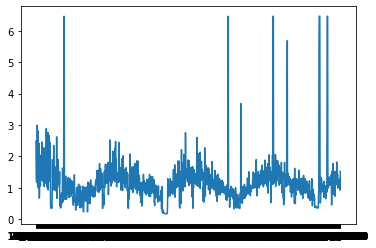

In [175]:
plt.plot(time_axis, energy_axis)